# Wstęp do Machine Learning - praca domowa

## Zbior german credit data

### Wczytanie pakietów

In [296]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score, mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, roc_curve,plot_roc_curve

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
pd.set_option("display.max_columns", 101) ## to pomoże nam przy metodzie head zobaczyć wszystkie kolumny
plt.rcParams["figure.figsize"] = (20,3)

### Eksploracja

#### Wczytanie zbioru danych

In [297]:
df = pd.read_csv('german_credit_data.csv')

#### Przegląd danych w zbiorze
##### Metody
1. head
2. info
3. shape
4. describe
5. value_counts

In [298]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [300]:
print(df.shape)

(1000, 10)


In [301]:

df[['Age', 'Credit amount', 'Duration']].describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [302]:

df.value_counts()

Unnamed: 0  Age  Sex     Job  Housing  Saving accounts  Checking account  Credit amount  Duration  Purpose            
1           22   female  2    own      little           moderate          5951           48        radio/TV               1
677         24   male    2    own      moderate         moderate          5595           72        radio/TV               1
668         43   male    2    rent     little           little            4843           12        car                    1
666         34   male    2    own      rich             moderate          3496           30        furniture/equipment    1
664         50   female  1    own      little           rich              1047           6         education              1
                                                                                                                         ..
321         32   male    2    own      little           little            1938           24        radio/TV               1
320         2

#### Sprawdzenie udziału poszczególnych kategorii - zadanie samodzielne


### Wykresy
1. Pudełko
2. Histogram

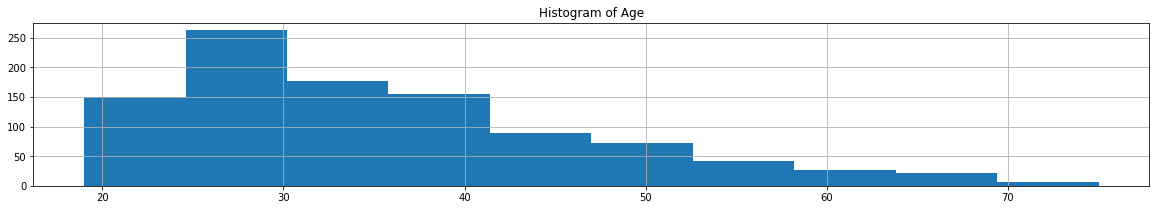

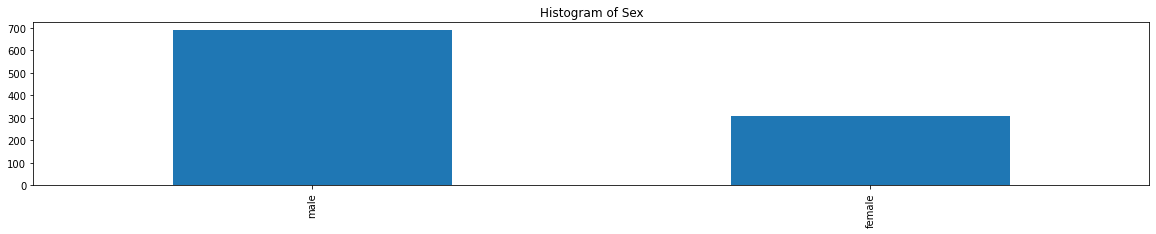

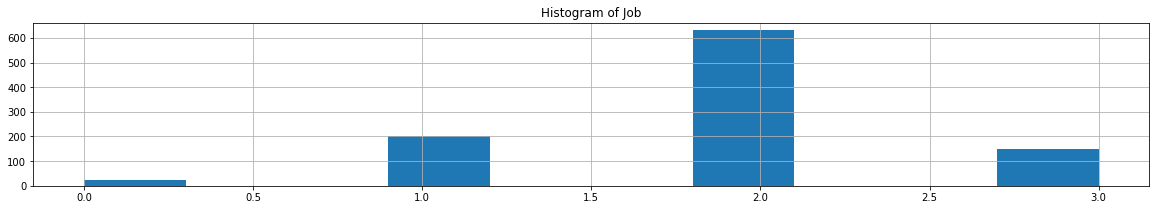

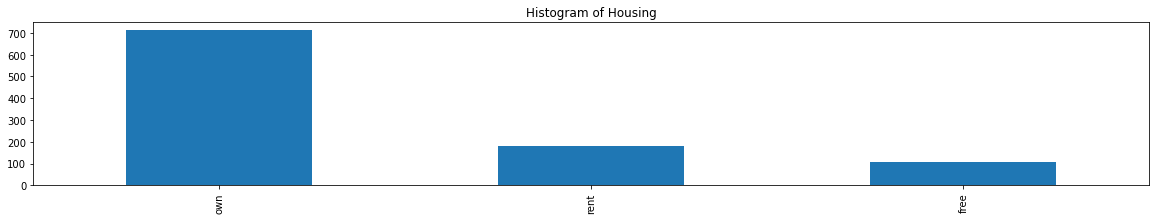

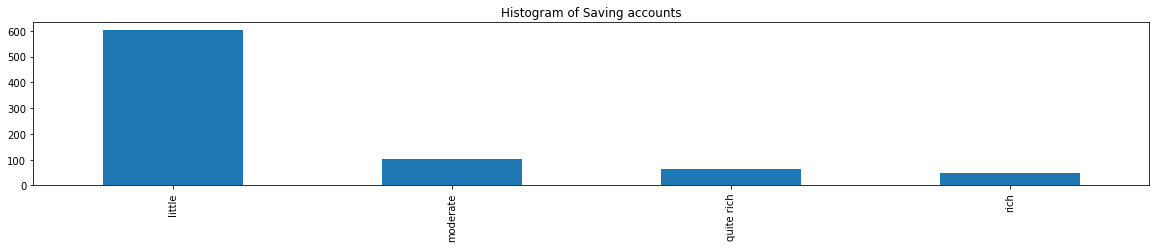

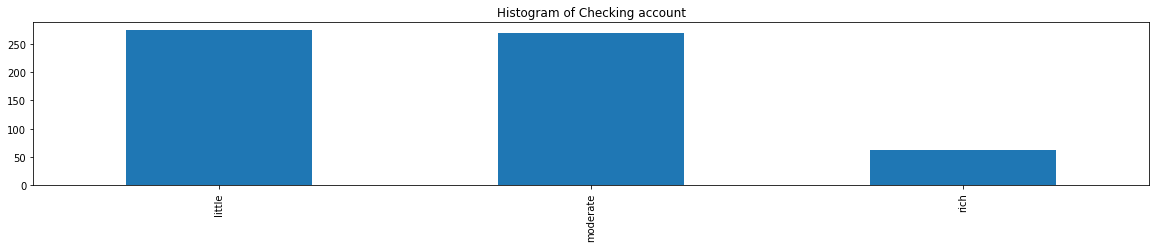

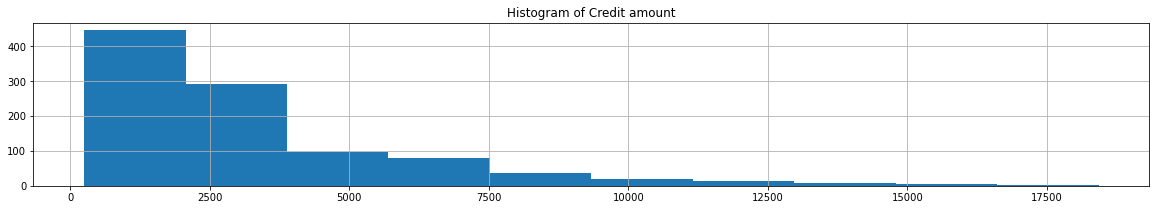

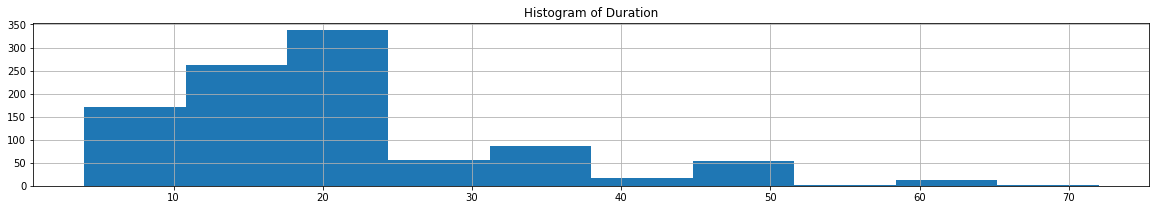

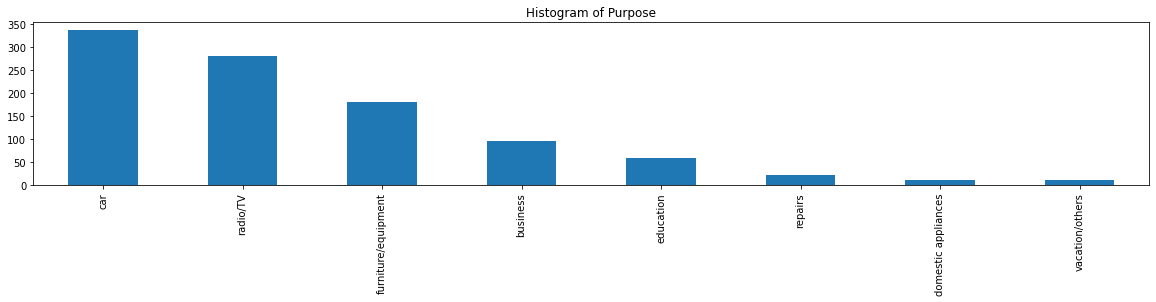

In [303]:
cat_df = ["Age",  "Sex", "Job",  "Housing",  "Saving accounts",  'Checking account',  "Credit amount",  "Duration",  "Purpose"]
df_cleaned = df[cat_df]
for col_name in cat_df:
    if df_cleaned[col_name].dtype == type(object):
        df_cleaned[col_name].value_counts().plot(kind='bar')
    else:
        df_cleaned.hist(col_name)

    plt.title(f'Histogram of {col_name}')
    plt.show()

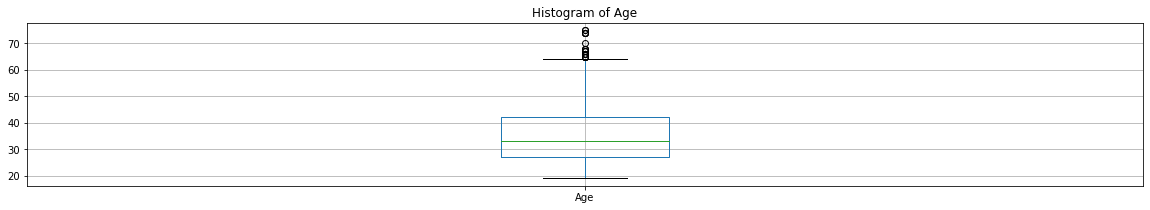

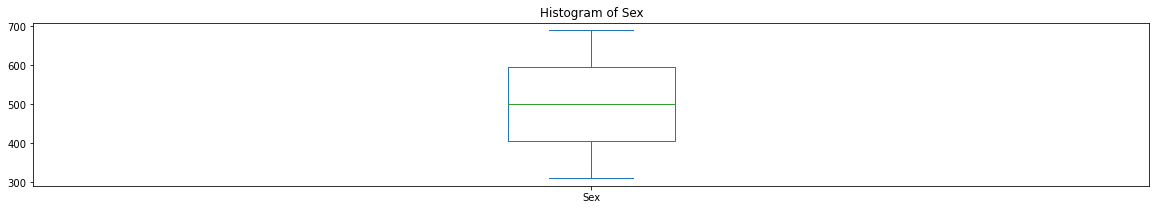

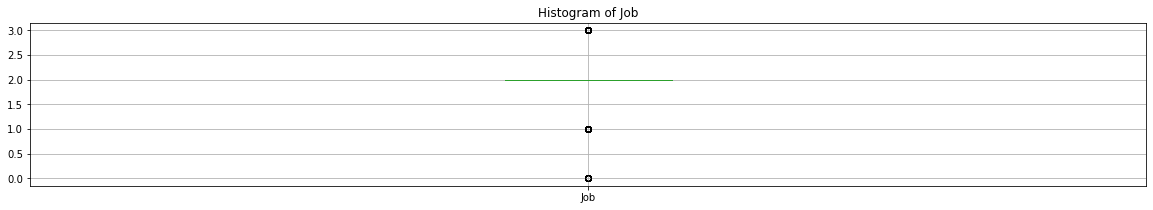

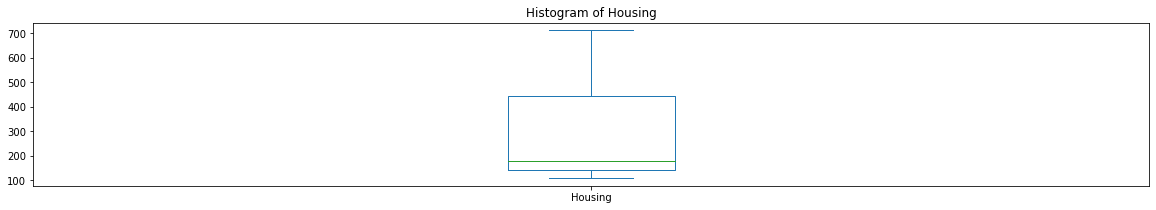

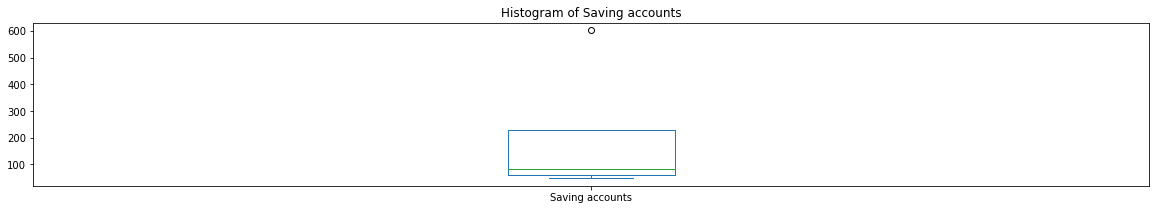

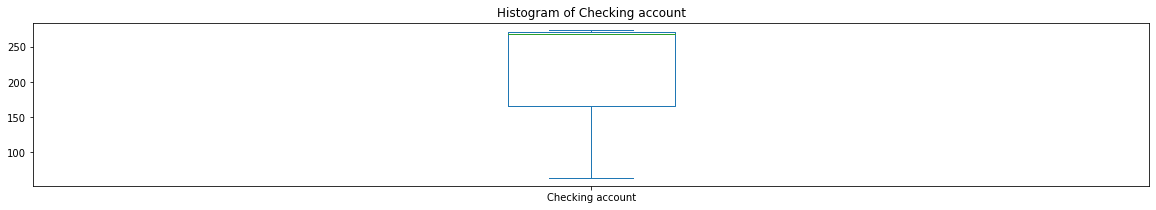

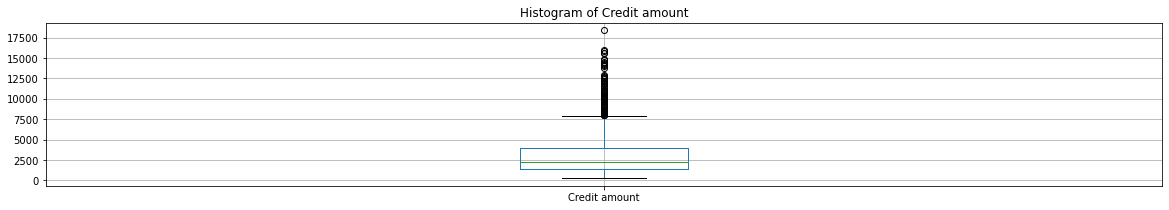

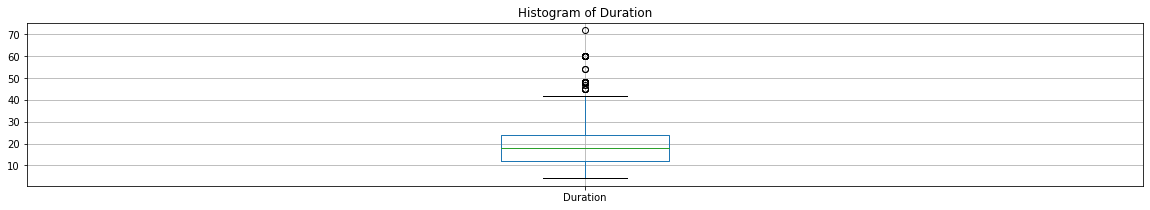

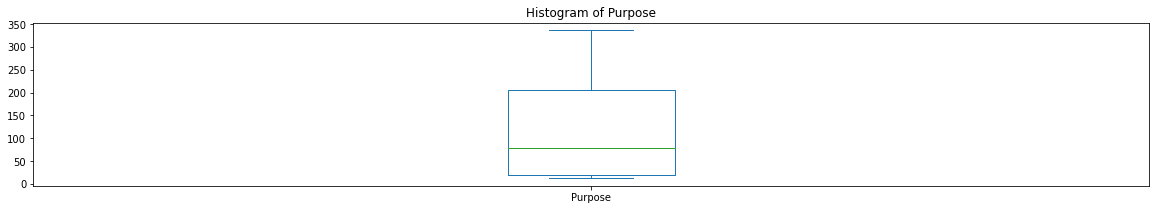

In [304]:
for col_name in cat_df:
    if df_cleaned[col_name].dtype == type(object):
        df_cleaned[col_name].value_counts().plot(kind='box')
    else:
        df_cleaned.boxplot(col_name)

    plt.title(f'Histogram of {col_name}')
    plt.show()

#### Sprawdzenie braków danych

In [305]:

df_cleaned_no_na = df_cleaned.dropna()
df_cleaned_no_na.isna()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
989,False,False,False,False,False,False,False,False,False
993,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


#### Korelacja

In [306]:
df_cleaned_no_na[['Age',	'Credit amount', 'Duration']].corr()


,Age,Credit amount,Duration
Age,1.000000,0.082014,0.001549
Credit amount,0.082014,1.000000,0.613298
Duration,0.001549,0.613298,1.000000


### Feature Engineering
#### Stworzenie zmiennych 0-1 dla kategorii lub labelencodera
Użycie funkcji z pandas get_dummies() lub labelencoder()

In [307]:
df_standardised = pd.get_dummies(df_cleaned_no_na, columns=['Sex',	'Housing', 'Saving accounts',	'Checking account', 'Duration', 'Purpose'])
df_standardised.head()

,Age,Job,Credit amount,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Duration_6,Duration_7,Duration_8,Duration_9,Duration_10,Duration_11,Duration_12,Duration_13,Duration_14,Duration_15,Duration_16,Duration_18,Duration_20,Duration_21,Duration_24,Duration_26,Duration_27,Duration_28,Duration_30,Duration_33,Duration_36,Duration_39,Duration_40,Duration_42,Duration_45,Duration_47,Duration_48,Duration_54,Duration_60,Duration_72,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
1,22,2,5951,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,45,2,7882,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,35,3,6948,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,28,3,5234,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [308]:
columns=['Sex',	'Housing', 'Saving accounts', 'Job', 'Checking account', 'Purpose']
df_standardised2 = df_cleaned_no_na
le = LabelEncoder() # odwrocic proces mozna za pomoca le.inverse_transform
for col in columns:
    le.fit(df_standardised2[col])
    print(col, le.classes_)
    df_standardised2[col] = le.transform(df_standardised2[col])

print(df_standardised2.head())

Sex ['female' 'male']
Housing ['free' 'own' 'rent']
Saving accounts ['little' 'moderate' 'quite rich' 'rich']
Job [0 1 2 3]
Checking account ['little' 'moderate' 'rich']
Purpose ['business' 'car' 'domestic appliances' 'education' 'furniture/equipment'
 'radio/TV' 'repairs' 'vacation/others']
   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
1   22    0    2        1                0                 1           5951   
3   45    1    2        0                0                 0           7882   
4   53    1    2        0                0                 0           4870   
7   35    1    3        2                0                 1           6948   
9   28    1    3        1                0                 1           5234   

   Duration  Purpose  
1        48        5  
3        42        4  
4        24        1  
7        36        1  
9        30        1  


C:\Users\AMD\AppData\Local\Temp/ipykernel_16320/3480531325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_standardised2[col] = le.transform(df_standardised2[col])


#### Wytypowanie zmiennych na podstawie korelacji i analizy zmiennych 0-1

In [309]:
# Duration ma tendencje jednoznacznie rosnace wzgledem kolumny  credit amount

### Przygotowanie zbioru
#### Podział zbioru na treningowy i testowy

#### Standaryzacja

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # funkcja obliczająca metrykę
from sklearn.preprocessing import LabelEncoder # funkcja do kodowania etykiet na liczby całkowite

le = LabelEncoder()
df_ml = df_cleaned_no_na
for col in df_cleaned_no_na.columns:
    if df_ml[col].dtype == df['Sex'].dtype and col != 'Purpose':
        le.fit(df_ml[col])


        df_ml[col] = le.transform(df_ml[col])
    
df_ml = (df_ml - df_ml.min()) / (df_ml.max() - df_ml.min())
df_ml.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,0.053571,0.0,0.666667,0.5,0.0,0.5,0.312707,0.636364,0.714286
3,0.464286,1.0,0.666667,0.0,0.0,0.0,0.419110,0.545455,0.571429
4,0.607143,1.0,0.666667,0.0,0.0,0.0,0.253141,0.272727,0.142857
7,0.285714,1.0,1.000000,1.0,0.0,0.5,0.367644,0.454545,0.142857
9,0.160714,1.0,1.000000,0.5,0.0,0.5,0.273198,0.363636,0.142857


#### Analiza głównych składowych

In [311]:
df_ml.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,0.283730,0.678161,0.625160,0.541188,0.114304,0.316092,0.165459,0.232410,0.411604
std,0.210499,0.467630,0.227604,0.285156,0.253623,0.330314,0.161404,0.189001,0.284934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.000000,0.666667,0.500000,0.000000,0.000000,0.056287,0.090909,0.142857
50%,0.223214,1.000000,0.666667,0.500000,0.000000,0.500000,0.112988,0.181818,0.571429
75%,0.392857,1.000000,0.666667,0.500000,0.000000,0.500000,0.203617,0.314394,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Estymacja modelu klasyfikacyjnego

In [312]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score, roc_curve

In [313]:

X = df_ml[[col for col in df_ml.columns if col != 'Purpose']].to_numpy()
y = df_cleaned_no_na['Purpose'].to_numpy()
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

In [314]:
cl = DecisionTreeClassifier()
cl.fit(train_X, train_y)


DecisionTreeClassifier()

### Ocena jakości modelu klasyfikacyjnego

In [315]:
predictions = cl.predict(test_X)
predictions
mse = np.sqrt(mean_squared_error(test_y, predictions))
print('MSE', mse)
correct = 0
for index, p in enumerate(predictions):
    if p == test_y[index]:
        correct += 1

accuracy = correct / len(test_y)
print(f'Accuracy: {accuracy:.8f}')

MSE 2.712706881687404
Accuracy: 0.30534351


Zadanie polega na rozszerzeniu zadania domowego nr 8 (tzn. po wstępie do ML)
1. Zmodyfikuj wyestymowany model dodając do niego hiperparametry.
2. Zoptymalizuj wybrany przez siebie hiperparametr np. za pomocą estymacji wariantów modeli w pętli. 
3. Wytypuj najbardziej informatywne zmienne i stwórz dla nich model regresji logistycznej.
4. Porównaj jakość 3 modeli: drzewa decyzyjnego, drzewa decyzyjnego dla zoptymalizowanych parametrów oraz regresji logistycznej.
5. Jakość modeli wyznacz za pomocą przynajmniej dwóch cech (w tym jedną z nich powinien być krzywą roc lub auc)
6. Wybierz najlepszy model. Wynik uzasadnij.

Zadanie dodatkowe:
Stwórz model drzewa decyzyjnego regresyjnego na podstawie zbioru danych Boston (szacowanie ceny mieszkań) dostępnego w materiałach z zajęć o drzewach decyzyjnych.
Oceń model zgodnie z obowiązującymi zasadami. Użyj hiperparametrów. 

In [316]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'splitter':('best', 'random'),
    'max_depth': (None, 5, 6, 7, 8, 9, 10),
    'max_features': ('auto','sqrt','log2'),
    'criterion': ('gini', 'entropy')
    }
cl = DecisionTreeClassifier()
clf = GridSearchCV(cl, parameters)
#clf.fit(df_cleaned_no_na.iloc[:,1:-1], df_cleaned_no_na['Purpose'])
clf.fit(train_X, train_y)
sorted(clf.cv_results_.keys())

predictions = clf.predict(test_X)
mse = np.sqrt(mean_squared_error(test_y, predictions))
print('MSE', mse)

correct = 0
for index, p in enumerate(predictions):
    if p == test_y[index]:
        correct += 1

accuracy = correct / len(test_y)
print(f'Accuracy: {accuracy:.8f}')


MSE 2.5517543733046466
Accuracy: 0.37404580


In [317]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
mse = np.sqrt(mean_squared_error(test_y, predictions))
print('MSE', mse)

correct = 0
for index, p in enumerate(predictions):
    if p == test_y[index]:
        correct += 1

accuracy = correct / len(test_y)
print(f'Accuracy: {accuracy:.8f}')


MSE 2.4866053379799196
Accuracy: 0.37404580


In [318]:
df_cleaned_no_na.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,34.888889,0.678161,1.875479,1.082375,0.342912,0.632184,3278.745211,21.339080,2.881226
std,11.787918,0.467630,0.682811,0.570311,0.760870,0.660627,2929.155177,12.474079,1.994540
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.000000,6.000000,0.000000
25%,26.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1297.500000,12.000000,1.000000
50%,31.500000,1.000000,2.000000,1.000000,0.000000,1.000000,2326.500000,18.000000,4.000000
75%,41.000000,1.000000,2.000000,1.000000,0.000000,1.000000,3971.250000,26.750000,5.000000
max,75.000000,1.000000,3.000000,2.000000,3.000000,2.000000,18424.000000,72.000000,7.000000


                       Age       Sex       Job   Housing  Saving accounts  \
Age               1.000000  0.126859  0.039771 -0.312977        -0.018856   
Sex               0.126859  1.000000  0.072618 -0.188279        -0.023686   
Job               0.039771  0.072618  1.000000 -0.126405        -0.039570   
Housing          -0.312977 -0.188279 -0.126405  1.000000         0.049783   
Saving accounts  -0.018856 -0.023686 -0.039570  0.049783         1.000000   
Checking account  0.001643 -0.029780 -0.008119 -0.026409         0.159763   
Credit amount     0.082014  0.080403  0.334721 -0.123783        -0.066758   
Duration          0.001549  0.078630  0.200794 -0.131549        -0.041800   
Purpose          -0.083995 -0.096625 -0.029202  0.038990        -0.037613   

                  Checking account  Credit amount  Duration   Purpose  
Age                       0.001643       0.082014  0.001549 -0.083995  
Sex                      -0.029780       0.080403  0.078630 -0.096625  
Job          

<AxesSubplot:>

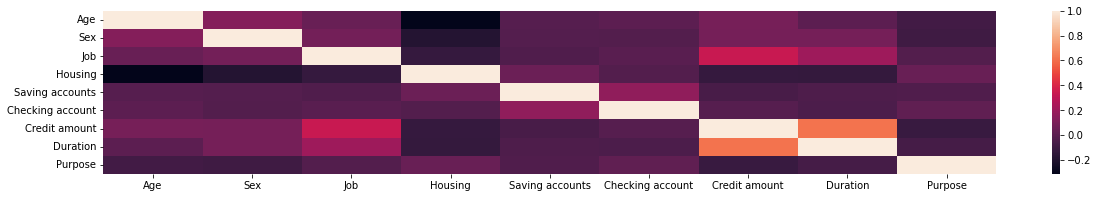

In [319]:
corr = df_cleaned_no_na.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [320]:
features= ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']

In [321]:
print(features)

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']


In [322]:
train_X_, test_X_, train_y_, test_y_ = train_test_split(df_cleaned_no_na[features], df_cleaned_no_na['Purpose'], test_size=0.3, random_state=25)

In [323]:
train_X_.head()


,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
954,0,2,1,0,0,1893,12
37,1,2,1,0,2,2100,18
148,1,2,1,0,0,5371,36
708,0,2,1,0,1,1206,9
973,1,2,2,0,0,7297,60


In [324]:
lr2 = DecisionTreeClassifier(max_depth=3)

In [325]:
lr2.fit(train_X_, train_y_)

DecisionTreeClassifier(max_depth=3)

[Text(1116.0, 1189.125, 'Credit amount <= 2679.0\ngini = 0.768\nsamples = 365\nvalue = [36, 122, 5, 18, 82, 87, 10, 5]'),
 Text(558.0, 849.375, 'Job <= 0.5\ngini = 0.753\nsamples = 207\nvalue = [15, 65, 4, 9, 35, 69, 7, 3]'),
 Text(279.0, 509.625, 'Credit amount <= 659.0\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 0, 0, 0, 0, 1, 0]'),
 Text(139.5, 169.875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(418.5, 169.875, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 0, 0, 0, 0, 1, 0]'),
 Text(837.0, 509.625, 'Checking account <= 0.5\ngini = 0.752\nsamples = 200\nvalue = [14, 60, 4, 9, 35, 69, 6, 3]'),
 Text(697.5, 169.875, 'gini = 0.753\nsamples = 97\nvalue = [5, 32, 3, 3, 24, 26, 2, 2]'),
 Text(976.5, 169.875, 'gini = 0.728\nsamples = 103\nvalue = [9, 28, 1, 6, 11, 43, 4, 1]'),
 Text(1674.0, 849.375, 'Credit amount <= 3650.5\ngini = 0.747\nsamples = 158\nvalue = [21, 57, 1, 9, 47, 18, 3, 2]'),
 Text(1395.0, 509.625, 'Credit amount <= 3581.5\ngini = 0.653\nsamples = 48\nv

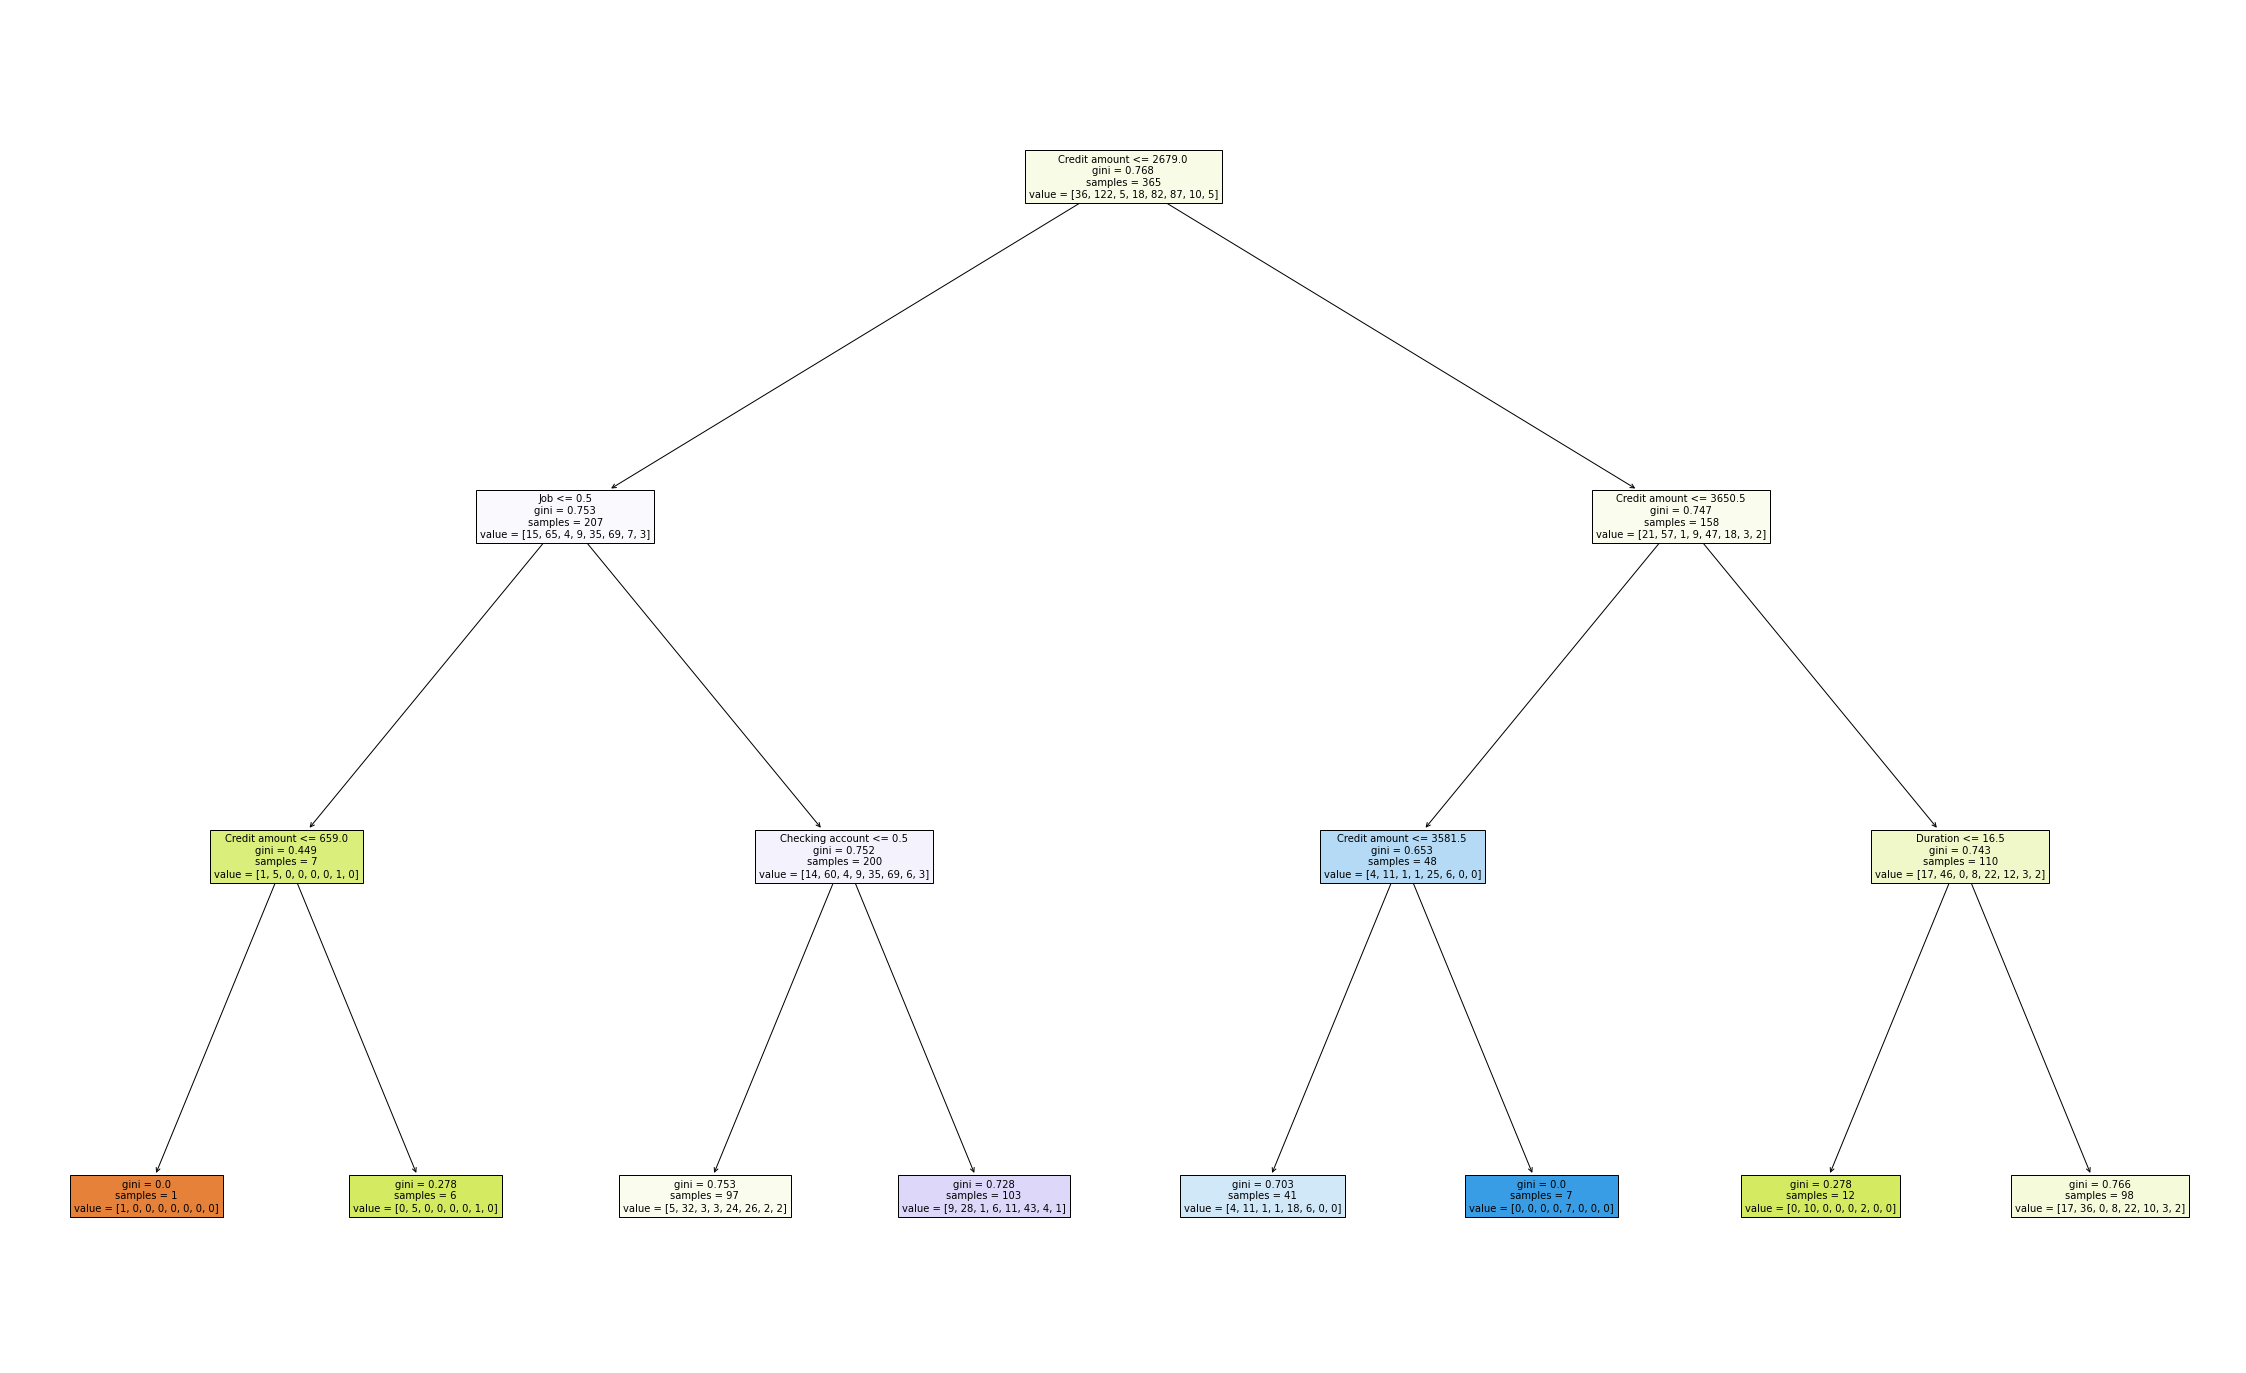

In [326]:
plt.figure(figsize=(40,25))
plot_tree(lr2, fontsize=10, feature_names=features, filled=True)

In [327]:
lr3 = LogisticRegression()

In [328]:
lr3.fit(train_X_, train_y_)

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [329]:
train_1 = lr3.predict(train_X_)
test_1 = lr3.predict(test_X_)
print(test_1)

[5 1 1 1 1 1 1 1 5 5 1 1 1 1 1 5 5 5 1 1 5 5 1 1 1 1 1 5 5 1 1 1 5 1 5 1 1
 5 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 5 5 1 1 5 5 1 1 3 1 5 1 5 5 1 5 1 1
 1 1 5 5 1 5 5 1 5 1 1 5 1 5 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 5
 1 1 5 1 5 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 5 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1
 5 1 5 5 1 1 1 1 1]


In [330]:
test_1.mean()

2.031847133757962

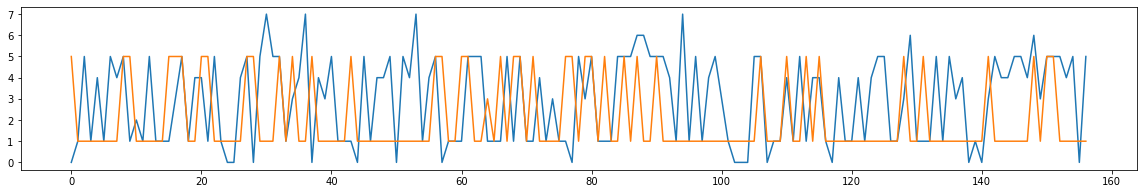

In [331]:
test_y_.reset_index()['Purpose'].plot()
plt.plot(test_1)

752    0
746    1
139    5
457    1
172    4
      ..
976    5
79     4
762    5
375    0
777    5
Name: Purpose, Length: 157, dtype: int32


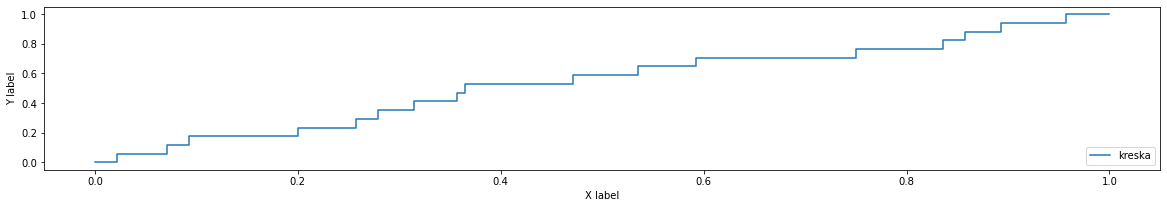

In [341]:
#define metrics
y_pred_proba = lr3.predict_proba(test_X_)[::,1]
print(test_y_)
roc_auc_score(test_y_, y_pred_proba, multi_class='ovr')
fpr, tpr, _ = metrics.roc_curve(test_y_,  y_pred_proba)



# #create ROC curve
plt.plot(fpr,tpr,label="kreska")
plt.ylabel('Y label')
plt.xlabel('X label')
plt.legend(loc=4)
plt.show()


